In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("Iris.csv")

In [11]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
data.rename(columns={'SepalLengthCm':'SL','SepalWidthCm':'SW','PetalLengthCm':'PL','PetalWidthCm':'PW'},inplace=True)

In [13]:
data.head()

,Id,SL,SW,PL,PW,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
iris_setosa = data[data['Species']=='Iris-setosa']
iris_versicolor = data[data['Species']=='Iris-versicolor']
iris_virginica = data[data['Species']=='Iris-virginica']

**1. Mean**

In [23]:
#SPetal_width
print(np.mean(iris_setosa['PW']))
print(np.mean(iris_versicolor['PW']))
print(np.mean(iris_virginica['PW']))

0.244
1.3259999999999998
2.0260000000000002


In [24]:
#Petal_length
print(np.mean(iris_setosa['PL']))
print(np.mean(iris_versicolor['PL']))
print(np.mean(iris_virginica['PL']))

1.464
4.26
5.5520000000000005


**The problem with outliers**

(array([ 1.,  1.,  2.,  7., 12., 14.,  7.,  4.,  0.,  2.]),
 array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ]),
 <BarContainer object of 10 artists>)

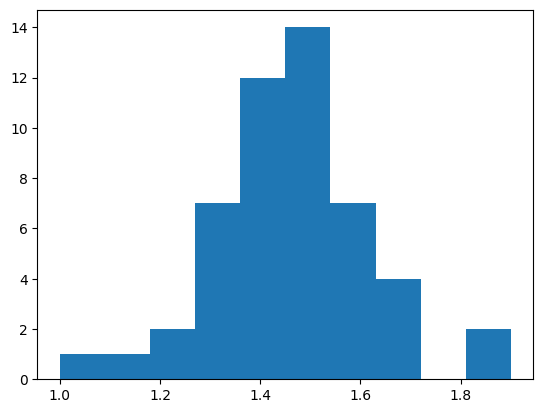

In [25]:
plt.hist(iris_setosa['PL'])

*If data contains any outliers it will skew mean*

**Median**

- Central tendacy of data or middle point in simple

In [27]:
print(np.median(iris_setosa['PL']))
print(np.median(iris_versicolor['PL']))
print(np.median(iris_virginica['PL']))

1.5
4.35
5.55


**Mode**

- central tendancy but finds most recurring value

In [32]:
from scipy import stats
print(stats.mode(iris_setosa['PL']))
print(stats.mode(iris_versicolor['PL']))
print(stats.mode(iris_virginica['PL']))

ModeResult(mode=np.float64(1.5), count=np.int64(14))
ModeResult(mode=np.float64(4.5), count=np.int64(7))
ModeResult(mode=np.float64(5.1), count=np.int64(7))


---

---

# Measure of Spread

- Measures of Spread (also called measures of dispersion) tell us how much the data varies or how “spread out” the values are around the center.  
If measures of central tendency (mean, median, mode) tell you where the center is,
then measures of spread tell you how far the data points stray from that center.

1. Range
2. Interquartile Range (IQR)
3. Variance
4. Standard Deviation

**1. Range**

Difference between the largest and smallest points in your data.

In [34]:
r = np.max(iris_setosa['PL']) - np.min(iris_setosa['PL'])
print(f"Range -> {r}")

Range -> 0.8999999999999999


**2. Percentile**

    Percentage → "How much did I score compared to the full marks?"
    Percentile → "How many people scored less than me?"

Example:
If 100 students took a test, and you are at the 50th percentile, you scored better than 50 of them (and 49 scored higher, 1 tied with you), even if your raw percentage is 40% or 95% — percentile is about relative position, not absolute score.

In [43]:
print(np.percentile(iris_setosa['PL'],95))

1.7


      Uses NumPy to compute the value below which 95% of the petal length values fall.      

In [55]:
ll = [0,1,2,3,4,5,6,7,8,9]
print(np.percentile(ll,50)) #gives answer to what 50 percent of values in the data is less than what
print(ll)

4.5
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Given sorted data:  
$Percentile Position=k100×(N+1)$  
$Percentile Position=100k​×(N+1)$  

Where:  

    kk = desired percentile (e.g., 25 for 25th percentile)$
    NN = number of observations

Then interpolate between values if needed.

**3. Quartile**

Divides list of numbers into quaters  
The quaters are 'cuts'

In [58]:
print(np.percentile(iris_setosa['PL'],25))
print(np.percentile(iris_setosa['PL'],50))
print(np.percentile(iris_setosa['PL'],75))
print(np.percentile(iris_setosa['PL'],100))

1.4
1.5
1.5750000000000002
1.9


**4. IQR**

$Q3 - Q2$

In [60]:
IQR = np.percentile(iris_setosa['PL'],75)-np.percentile(iris_setosa['PL'],35)
IQR

np.float64(0.17500000000000027)

**5. Mean Absolute Deviation**

Absolute Deviation -> gives how much values are deviated from the obtained mean  
    $A = [1,2,3,4,5]$  
    $Mean = 15/5 = 3$    
    $Deviation = |1-3|+|2-3|+|3-3|+|4-3|+|5-3|$   
    $Mean Absolute Deviation = sum of Absolute Deviation / no.Absolute Deviation$

In [68]:
a = np.mean(iris_setosa['PL'])
b = map(lambda x: abs(x - a), iris_setosa['PL']) #Note that abs() is used to give absolute value or else it would be very very smALL AND NOT ZERO
print(np.mean(list(b)))

0.13088


**6. Variance**

Variance measures how far the data points are from the mean, on average, but it does so by squaring the deviations.
Squaring:

    Prevents positive and negative deviations from canceling out.

    Emphasizes larger deviations (outliers have a big effect).

Example:
If your dataset is [2, 4, 6],

    Mean = 4

    Deviations = [-2, 0, 2]

    Squared deviations = [4, 0, 4]

    Variance = Average = 4+0+43=2.6734+0+4​=2.67 (for population).

Population Variance  
$σ2=∑i=1N(xi−μ)2N$  
$σ2=N∑i=1N​(xi​−μ)2​$  
Sample Variance

(Uses n−1n−1 instead of nn for Bessel’s correction — unbiased estimate of population variance)  
$s2=∑i=1n(xi−xˉ)2n−1$  
$s2=n−1∑i=1n​(xi​−xˉ)2​$  

In [69]:
np.var(iris_setosa['PL'])

np.float64(0.029504000000000002)

Because of it getting squared it doesnt fit in same unit as rest of data hence `SD` was introduced
- If lets say we were to calculate variance of heights($cm$) the variance obtained will be in heights($cm^2$)

**7. Variance vs Median Absolute Deviation**

Variance In comparison to MAD as it works on squaring(a smooth function)the deviation is comparison to MAD where we use modulud(a non smooth function)

**8. Standard deviation**
$Sqrroot(Variance)$

In [71]:
np.std(iris_setosa['PL'])

np.float64(0.17176728442867112)

**9.Median Absolute Deviation**

Median of all the numbers obtained from subtracting and calculating the absolute value of every observation with the median,

Eg: $[1,3,5,6,7,8,9]$  
Median = $6$  
$|1-6|,|3-6|,|5-6|,|7-6|...$  
Ans = $[5,3,1,0,1,2,3]$  
_Arrange in ascending_ and calculate _Median_ = $2$  
Which is called MAD

In [76]:
from statsmodels import robust
a = abs(robust.mad(iris_setosa['PL']))
a

np.float64(0.14826022185056031)

**10. SD vs MAD**

If your data has outliers you should go with MAD  
If no outliers then SD majorly used

**11. Box Plots**

<Axes: xlabel='Species', ylabel='PL'>

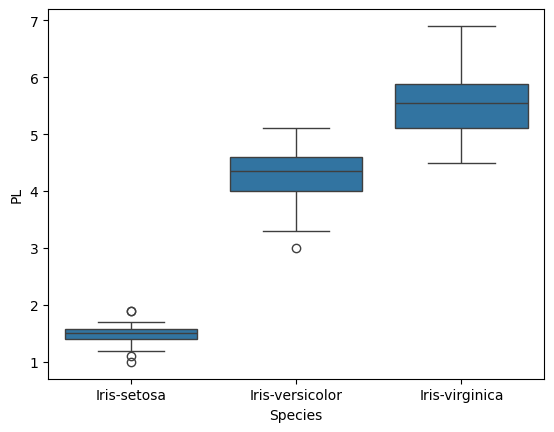

In [79]:
sns.boxplot(x='Species',y='PL',data = data)

---

---

**Probability Density Function**
- It’s a map that tells you how the values of something are spread out, and where they’re more likely to appear.  
 1) Plot histogram.
 2) Smooth in the Histogram using KDE.
 3) Simply getting probability of frequency of each datapoint and its on a graph where Y depicts your Prob.

**Petal Length**

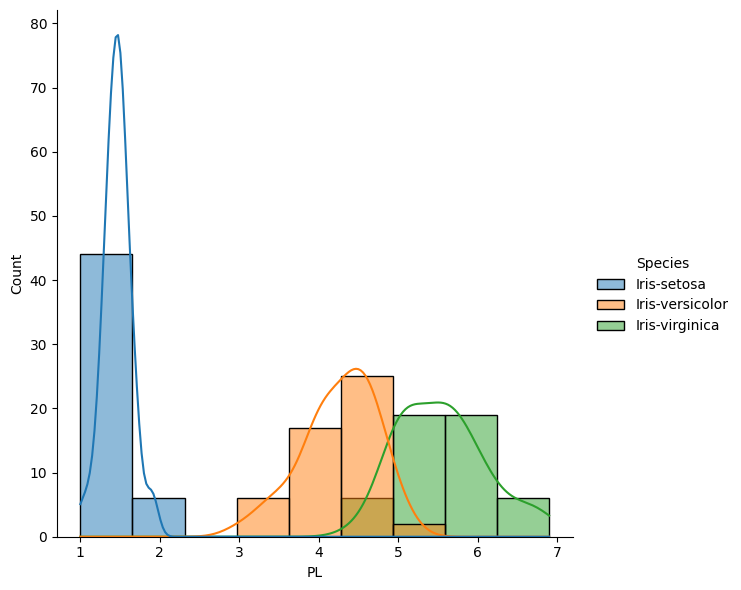

In [102]:
sns.displot(data=data, x='PL', hue='Species', kind='hist', kde=True, height=6)

We are abel to compare side by side all three flowers's petals
Let's say if we want to present a distinction between three of these species
1) iris-setosa clearly stands different as it is less than 3 as visible is histogram
2) But versicolor and virginica are overlapping hence we have to now focus on _KDE_ or _Kernel Density Estimation_.  
   a) there is a point between 4 and 5 where these two KDE intersects.  
   b) let's say this intersection point is 4.8 so we can say  
   - 4.8 < virginica  
    - 4.8 > versicolor
**BUT WHY**
1) If we clearly observe we can see that KDE stars decreasing for virginica after 4.9 (intersection point).  
2) And similarly KDE starts decreasing for versicolor before the same.  
_So we can rule out that not completely but probabilisticly._

**Petal Width**

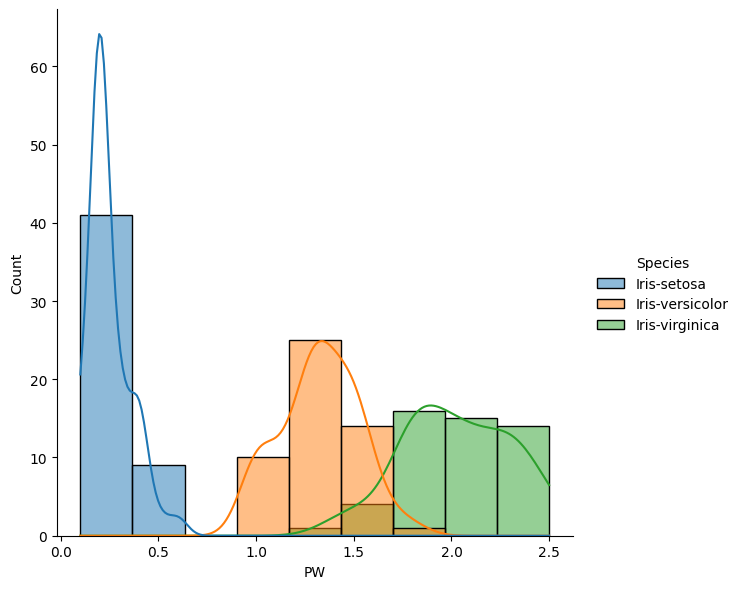

In [101]:
sns.displot(data=data, x='PW', hue='Species', kind='hist', kde=True, height=6)


**Sepal Width**

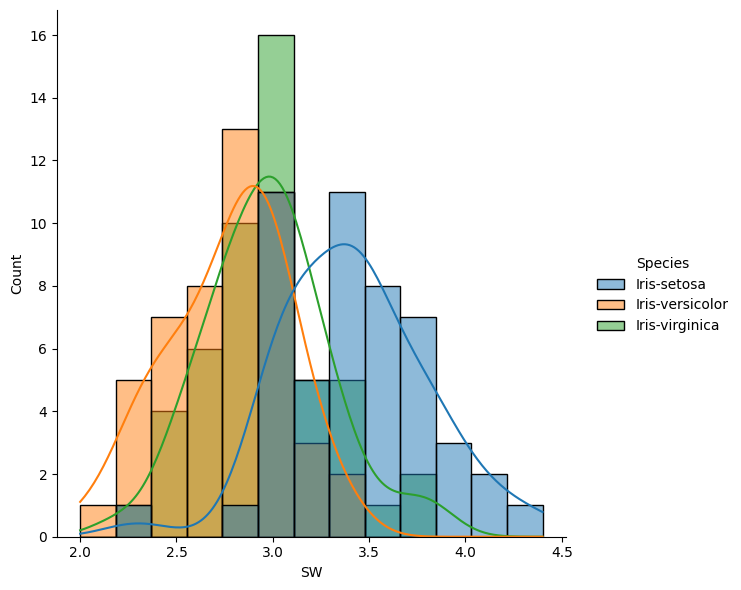

In [104]:
sns.displot(data=data, x='SW', hue='Species', kind='hist', kde=True, height=6)

**Sepal Lenght**

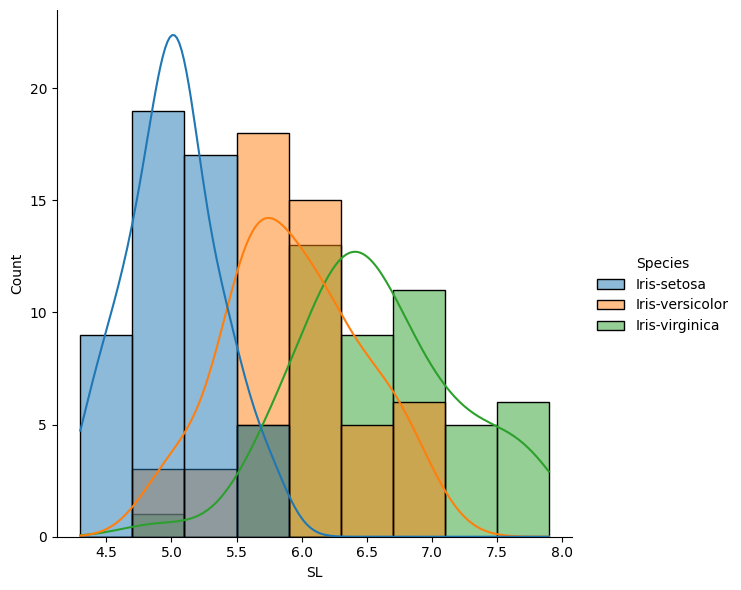

In [103]:
sns.displot(data=data, x='SL', hue='Species', kind='hist', kde=True, height=6)

**From all the above obtained graphs it can be clearly ruled that the best way to differentiate between all three types of flowers is by <mark>Petal Length or PL</mark> as only they offer some gullible conclusions.**

The histogram showed how many flowers had each length range.  
The KDE line is basically the PDF a smooth curve showing where most of the flowers petal lengths are.  
Now, what does it tell you?  
Tall peaks in the PDF = “A lot of flowers are around this length.”  
Low valleys = “Few flowers have this length.”  
The shape of the PDF tells you how the values are distributed.  

---

**Cumulative Distribution Function**

On integrating area under the curver of PDF from 0 to point we want we get CDF.

Similarly on differentiating CDF we get PDF.

In [27]:
counts, bin_edges=np.histogram(iris_setosa['PetalLengthCm'], bins=10)
#here counts tell us how many petals are there in a box.
#and bin_endges tells where the box starts and ends.
#this code is also used to create data for histogram

Suppose PetalLengthCm for Setosa ranges from 1.0 cm to 1.9 cm.  
If we say bins=10, NumPy will split that range into 10 small slices:  

>1.0–1.09  
>1.09–1.18  
>1.18–1.27  
>...  
>1.81–1.9

bin_edges will store these cutoff points so NumPy knows where each bin starts and ends.

In [37]:
counts

array([ 1,  1,  2,  7, 12, 14,  7,  4,  0,  2])

In [39]:
pdf = counts/sum(counts) #Probability 
cdf=np.cumsum(pdf) 
print(pdf)
print(cdf)

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


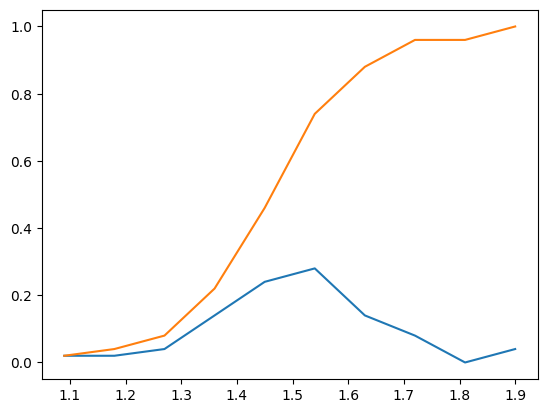

In [44]:
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

    Above was the way through which we calculate PDF and CDF

In [47]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**derriving out sense from these graphs**

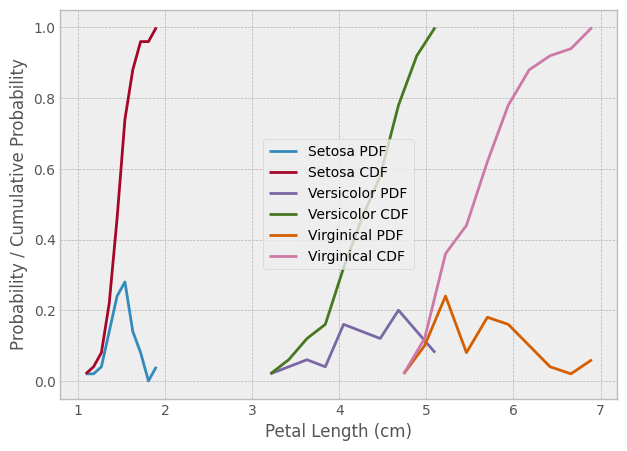

In [71]:
#plt.style.use('bmh')

counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label="Setosa PDF")
plt.plot(bin_edges[1:], cdf, label="Setosa CDF")

counts, bin_edges = np.histogram(iris_versicolor['PetalLengthCm'], bins=10)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label="Versicolor PDF")
plt.plot(bin_edges[1:], cdf, label="Versicolor CDF")

counts, bin_edges = np.histogram(iris_virginica['PetalLengthCm'], bins=10)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label="Virginical PDF")
plt.plot(bin_edges[1:], cdf, label="Virginical CDF") 

plt.xlabel("Petal Length (cm)")
plt.ylabel("Probability / Cumulative Probability")
plt.legend(loc='center')

Now how can we differentiate between all three flowers depending upon this graph?

**Clearly** : _Below 2(around 1.92 something)the probability of **Setosa** ends_    
                Hence we can say Petal length < 2 is Setosa  
**But for Virginica and Versicolor** : _We can see that there PDF is intersecting somewhere around 5_  
                                        and if we observe CDF then clearly around 95 Percent of Petals under 5cm are in Versicolor and 5 Percent above it.
                                        

---

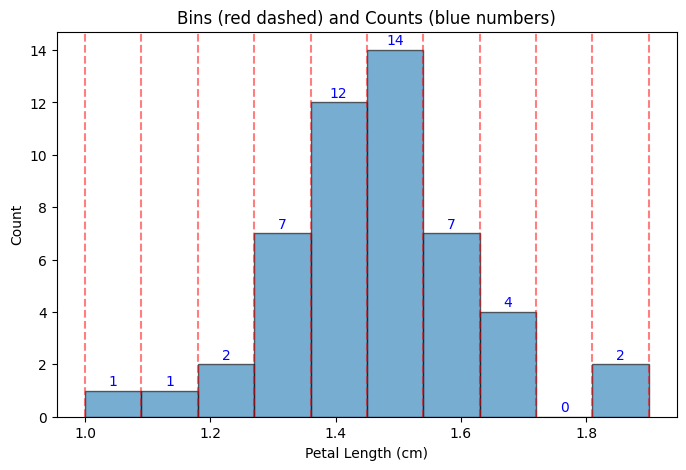

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Plot histogram manually to show bins and counts
fig, ax = plt.subplots(figsize=(8, 5))

# Plot bars for counts
ax.hist(iris_setosa['PetalLengthCm'], bins=10, edgecolor='black', alpha=0.6)

# Annotate bin edges and counts
for i in range(len(counts)):
    # Position at center of bin
    bin_center = (bin_edges[i] + bin_edges[i+1]) / 2
    ax.text(bin_center, counts[i] + 0.2, str(counts[i]), ha='center', color='blue', fontsize=10)

# Show bin edges lines
for edge in bin_edges:
    ax.axvline(edge, color='red', linestyle='--', alpha=0.5)

ax.set_xlabel("Petal Length (cm)")
ax.set_ylabel("Count")
ax.set_title("Bins (red dashed) and Counts (blue numbers)")
plt.show()


**<span style = "color : red"> Red dashed lines </span>** → the bin edges (the boundaries between bins).  
**<span style = "color : blue"> Blue numbers </span>** → how many data points (petals) fell inside each bin.  
**Bars** → height shows the count for that bin.

---

**NORMAL DISTRIBUTION**

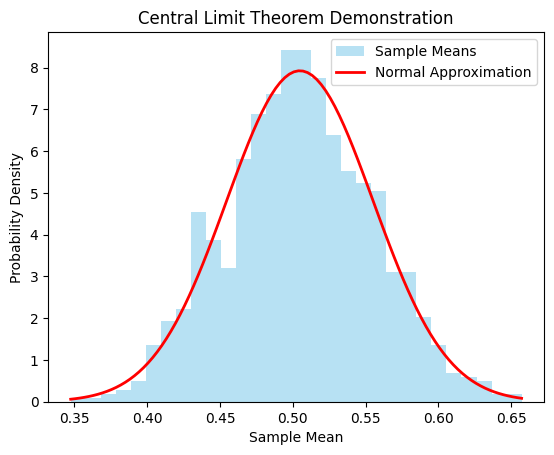

Mean:0.5048132178005157,SD:0.05035561493173486


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Simulate CLT
np.random.seed(42)

# Population: Uniform distribution (0 to 1)
population = np.random.uniform(0, 1, 100000)

# Sampling: Take many sample means
sample_means = []
for _ in range(1000):  # 1000 samples
    sample = np.random.choice(population, size=30)  # sample size = 30
    sample_means.append(np.mean(sample))

# 2. Plot histogram of sample means
plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='skyblue', label='Sample Means')

# 3. Overlay theoretical Normal curve
mean = np.mean(sample_means)
std_dev = np.std(sample_means)
x = np.linspace(min(sample_means), max(sample_means), 100)
y = 1/(std_dev*np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x - mean)/std_dev)**2)

plt.plot(x, y, color='red', linewidth=2, label='Normal Approximation')

# 4. Labels & title
plt.xlabel("Sample Mean")
plt.ylabel("Probability Density")
plt.title("Central Limit Theorem Demonstration")
plt.legend()
plt.show()
print(f"Mean:{mean},SD:{abs(std_dev)}")

**Properties**
1) Symmetrical  
2) Center -> Mean  
3) mean = median = mode  
4) area_under_curve = total probability = 1  
5) Empherical Law of 68-95-99% 
    - If you have noral distribution  
    - 68% of data(34 on left and 34 on right) [-1SD to 1SD]  
    - 95% of data(68 + 37) [-2SD to 2SD]  
    - 99% from -3SD to 3SD  

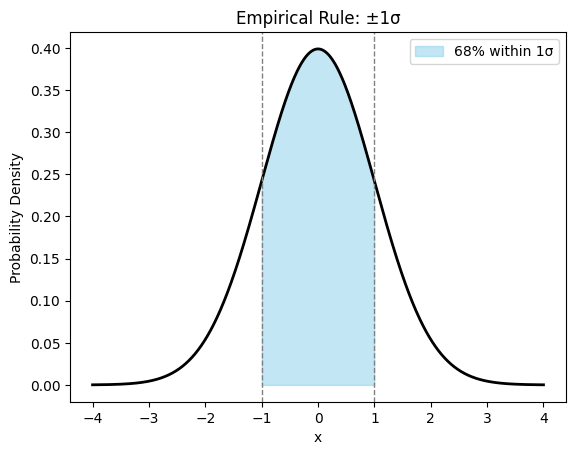

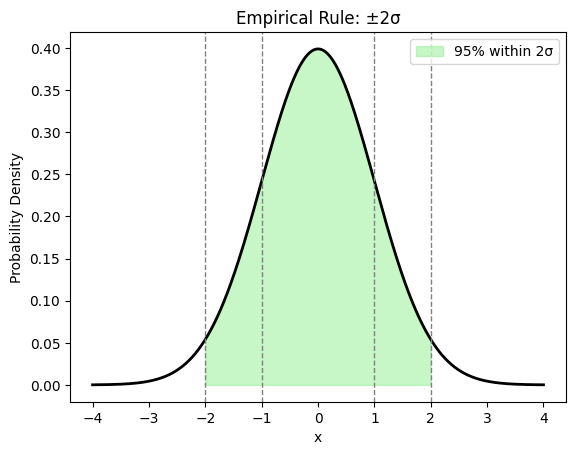

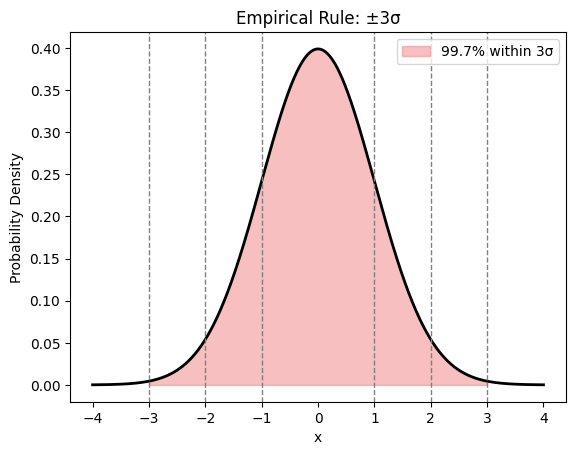

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu, sigma = 0, 1 

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, mu, sigma)

def plot_region(k, color, label):
    plt.plot(x, y, color="black", linewidth=2)
    plt.fill_between(x, y, where=(x>-k) & (x<k), color=color, alpha=0.5, label=label)
    
    for i in range(1, k+1):
        plt.axvline(mu+i*sigma, color='gray', linestyle='--', linewidth=1)
        plt.axvline(mu-i*sigma, color='gray', linestyle='--', linewidth=1)
    
    plt.title(f"Empirical Rule: ±{k}σ")
    plt.xlabel("x")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.show()

plot_region(1, "skyblue", "68% within 1σ")

plot_region(2, "lightgreen", "95% within 2σ")

plot_region(3, "lightcoral", "99.7% within 3σ")


1. First, recall what Standard Deviation (SD) means  
Imagine you and your friends measured your heights.  
Suppose the average height = 170 cm.  
Some people are a little taller, some shorter.  
The spread (how far data is scattered from the mean) is measured using Standard Deviation (SD).  

- If SD = 10 cm:  
Most people are between 160 cm (170 - 10) and 180 cm (170 + 10).  
But some rare people may be much shorter or taller (150 or 190+).  

---

**1. Standardization** {Converting to normal values}

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

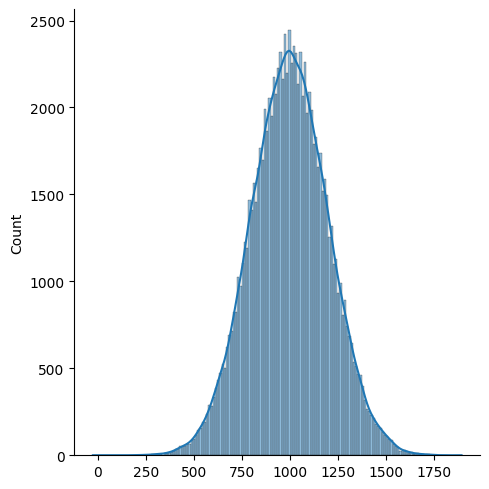

In [25]:
#Now generating 1000 integers with mean&std speciefied
#where LOC = mean and Scale = STD
draw = norm.ppf(np.random.random(100000), loc=1000, scale=200).astype(int)
sns.displot(draw,kde = True, )

we already know  
SD tells you how spread out the data is around the mean.  
**If SD is small** → data points are close to the mean (less variation).  
**If SD is large** → data points are far away from the mean (more variation).  

Imagine a class took a math test.  
The average score (mean) = 70.  

Two classes:  
Class A scores: 69, 70, 71, 72, 68  
Here, SD is small because everyone scored close to 70.  

Class B scores: 40, 55, 70, 85, 100  
And Here, SD is large because scores are spread out widely.  

**Z-Score**
The Z-score tells you how many standard deviations away a data point is from the mean.

Formula:
$z=(x−μ)/σ$

x = the value    
μ = mean  
σ = standard deviation  

Now let’s check some students’ scores:  
Mean (μ) = 70  
Standard Deviation (σ) = 10  
1) Alice scores 80 $z=(10-70)/10 = +1$  
2) Bob scores 60 $z=(60-70)/10 = -1$  
3) Charlie scores 100 $(100-70)/10 = +3$  

Z-score = how far YOUR score is from average in terms of SD.

In [26]:
z = []
for i in draw:
    z.append((i-1000)/200)

In [27]:
a=np.array(z)

In [31]:
print(a.mean())
np.round(a.mean())

-0.0033703999999999995


np.float64(-0.0)

In [30]:
print(a.std())
print(np.round(a.std()))

1.0033686734714413
1.0


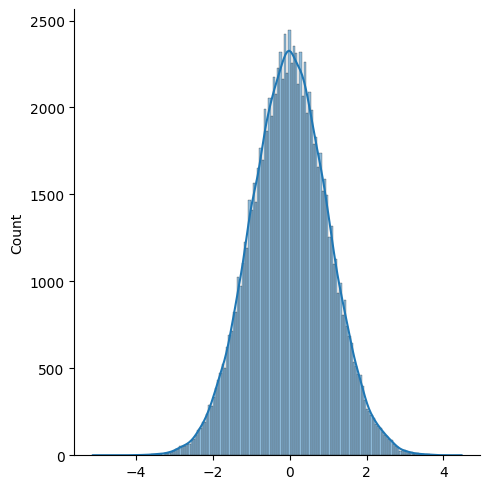

In [34]:
sns.displot(a, kde=True)

---

**Calculating Z Score**  
Imagine group of 300 students took a test. Rohit scored 700 out of 1000. The average score was 500 and the SD was 120. Assuming that test scores followed normal distribution find out how well Rohit performed in comparison to his peers

_**Even if your population data is messy, the averages of samples behave normally!**_

In [36]:
z = (700-500)/120
print(z)

1.6666666666666667


now **Refer to [Z-table](https://z-table.com/)**

1. Take first two digits of your Z value = `z = 1.6`
2. Now take the third digit of z value = `0.06`
3. 0.9515

In [38]:
a = 0.9515
#Now let's find out how many people scored less than Rahul
a * 100

95.15

Rohit performed better than 95% of his peers

--- 

**Central Limit Theorem**  
_If you take many random samples from any population (no matter how skewed or weird it looks), the distribution of the sample means will always be approximately Normal (bell-shaped), as the sample size grows (usually ≥ 30 is enough)._

In [41]:
data = pd.read_csv("deliveries.csv")

In [42]:
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [44]:
runs = data.groupby('batter').sum()['batsman_runs']

In [51]:
runs.info()

<class 'pandas.core.series.Series'>
Index: 673 entries, A Ashish Reddy to Z Khan
Series name: batsman_runs
Non-Null Count  Dtype
--------------  -----
673 non-null    int64
dtypes: int64(1)
memory usage: 26.7+ KB


<Axes: xlabel='batsman_runs', ylabel='Count'>

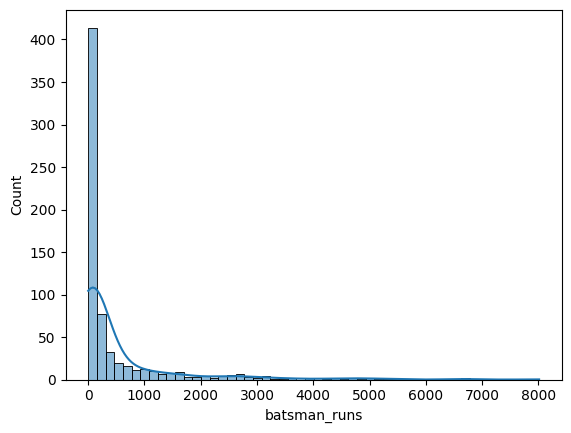

In [49]:
sns.histplot(runs, kde=True)

        This is not a normal distribution clearly

`n = 80/673, batsman taken per sample`  
`m = 1000, number of time sampling is done`

In [52]:
np.random.choice(runs, size=10) #With the help of this command we get random selections from our data

array([ 105, 1589,   25,  351,  131,  423,   25,  833,   20,   19])

    Each time, you take 80 batters and calculate their average runs.  
    Store all these 1000 averages.  

In [59]:
#Making a list of 1000 means of 80 random data points/new mean  
m=1000
n=80
new = []

for i in range(m):
    x = np.random.choice(runs, size=n)
    new.append(x.mean())

In [60]:
len(new) #just checking

1000

In [61]:
new = np.array(new) #converting list into array for further ops

<Axes: ylabel='Count'>

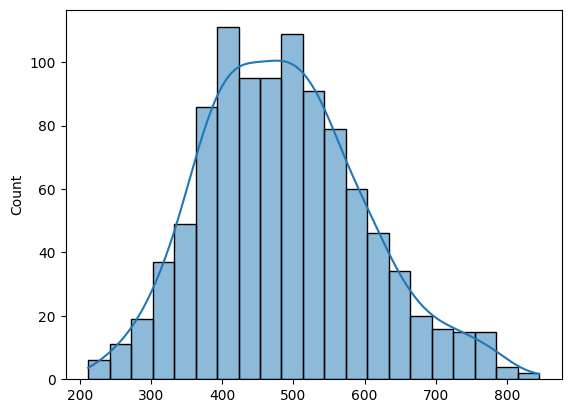

In [62]:
sns.histplot(new, kde=True)

    The variance/std of sample means is smaller than the original population.
    Why? Because when you average, extremes cancel out → less spread.
    Formula: σ/√n (population std divided by square root of sample size).
    Here n=80, so std is ~1/√80 of the original → and the numbers match closely.

In [86]:
print(f"mean main data : {runs.mean()}")
print(f"mean new data : {new.mean()}")
print(f"var main data : {runs.var()/80}")
print(f"var new data : {new.var()}")
print(f"std main data : {runs.std()/(np.sqrt(80))}")
print(f"std new data : {new.std()}")


mean main data : 490.4368499257058
mean new data : 487.358
var main data : 13547.971643715064
var new data : 12878.9178819375
std main data : 116.39575440588486
std new data : 113.48532011646924
